<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.normal(loc=5, scale=2, size=10)

array([6.05262551, 6.55509173, 4.89807927, 4.96114265, 5.50396596,
       4.54949375, 4.79580877, 6.91365538, 6.68065825, 5.3060477 ])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

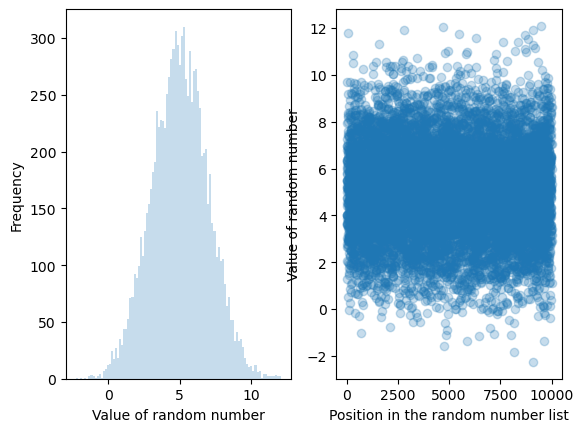

In [2]:
n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [3]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 69.36%


## 1 Brownian Motion in 1D

### 1.1 The scenario

 ###### normal probability stuff 
1 = q + p

### 1.2 The simulation

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

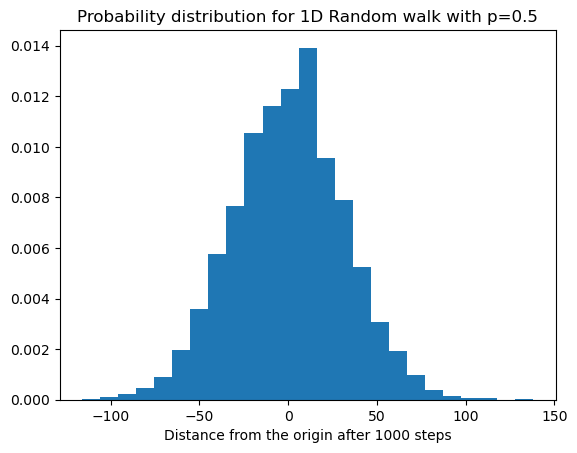

In [23]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

#matplotlib density true to normalise the area to 1

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

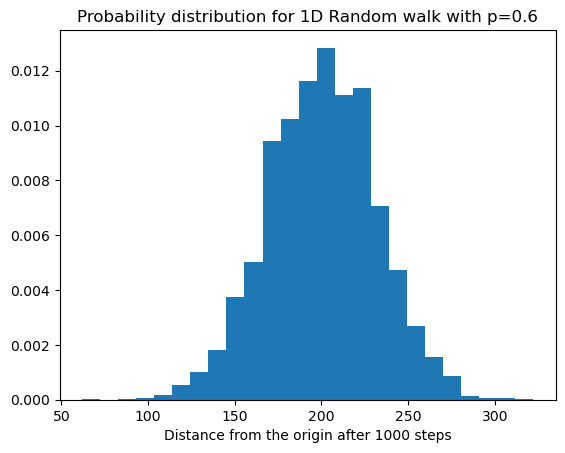

In [24]:
#for probability of .6 rather than .5

def brown_1d(prob_right=.6, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

import numpy.random as rnd

no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

#matplotlib density true to normalise the area to 1

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

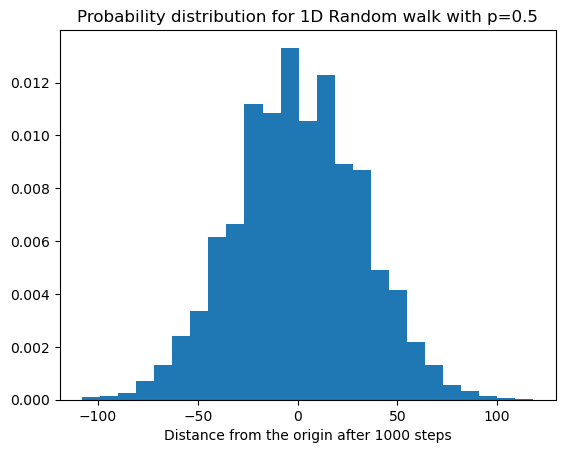

In [25]:
from matplotlib import pyplot as plt

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

#matplotlib density true to normalise the area to 1

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

In [26]:
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output 

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

NameError: name 'prob_right' is not defined

## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:
#some math 

### 2.2 A poor but intuitive solution

In [14]:

N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13112

### 2.3 A better solution

In [15]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.140256

### 2.4 A smarter solution

In [17]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.141688

## Exercise 1 :  Vital Stats of Random π

In [2]:
#estimating pi as a function
import math 
import numpy as np
import numpy.random as rnd

def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)

    return 4 * (N_green / n)
    

In [20]:
lis = []

for _ in range(100):
    lis.append(estimate_pi(n=10000))

nplis = np.array(lis)

np.mean(nplis)
np.std(nplis)


0.016169988991956676

In [9]:
j = [estimate_pi(n=10000) for i in range(100)]
print (j)

[3.1424, 3.1192, 3.1568, 3.1516, 3.1584, 3.1444, 3.1612, 3.1388, 3.1304, 3.1416, 3.1512, 3.126, 3.1332, 3.152, 3.1244, 3.1276, 3.142, 3.1828, 3.1116, 3.1332, 3.1192, 3.1428, 3.1388, 3.1432, 3.1524, 3.132, 3.1336, 3.1424, 3.1544, 3.1376, 3.144, 3.1448, 3.1436, 3.144, 3.1604, 3.13, 3.1384, 3.1288, 3.142, 3.1368, 3.12, 3.1468, 3.1532, 3.1768, 3.126, 3.1156, 3.1592, 3.1388, 3.1236, 3.1508, 3.1676, 3.1396, 3.1224, 3.132, 3.1424, 3.1396, 3.1516, 3.1756, 3.1444, 3.1388, 3.1324, 3.1668, 3.1324, 3.1144, 3.1728, 3.1212, 3.1168, 3.126, 3.116, 3.1244, 3.1508, 3.1484, 3.144, 3.1516, 3.16, 3.1184, 3.146, 3.1412, 3.158, 3.1304, 3.166, 3.1356, 3.1844, 3.1424, 3.1492, 3.1512, 3.1116, 3.1324, 3.1392, 3.1336, 3.1156, 3.1328, 3.1444, 3.1508, 3.1408, 3.1404, 3.1544, 3.1368, 3.1684, 3.1516]


0.015720976559997785

In [10]:
np.mean(j)

3.1415640000000002

In [11]:
np.std(j)

0.015720976559997785

In [29]:
n = [10,100,1000,1000,10000,100000,1000000]

m = [estimate_pi(k) for k in n]
print(m)
np.mean(m)

[2.4, 2.84, 3.084, 3.108, 3.1704, 3.14252, 3.143568]


2.9840697142857144

In [19]:
np.std(m)

0.04153549470621231

In [15]:
print(m)

[3.2, 3.12, 3.148, 3.252, 3.1496, 3.14948, 3.142708]


import numpy as np 
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1)

ax.plot(x, sin_x, label='') 

ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend('upper right')
ax.legend('upper left')

plt.show()

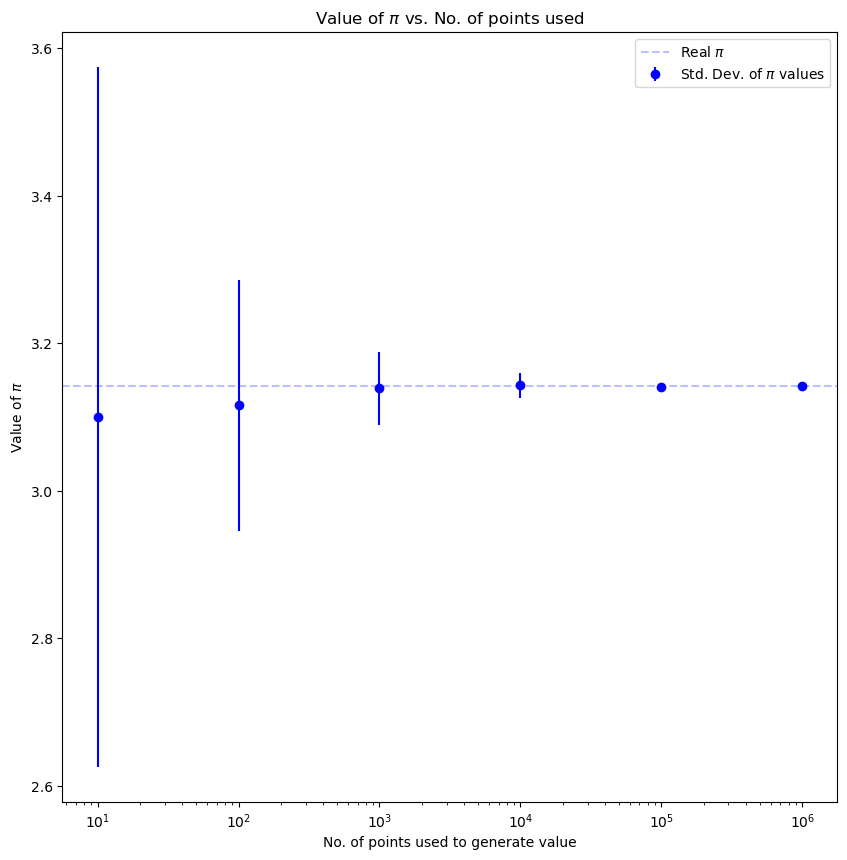

In [13]:
import numpy as np
import os
from matplotlib import pyplot as plt

x =  [10,100,1000,10000,100000,1000000]
y = []
y_err=[]


for o in x:
    m = [estimate_pi(o) for p in range(100)]
    y_err.append(np.std(m))
    y.append(np.mean(m))

plt.figure(figsize=(10,10))
plt.axhline(np.pi, ls='--', c = 'blue', label='Real $\pi$',alpha=.25)
plt.errorbar(x, y, yerr=y_err,
            color= 'blue',
             label='Std. Dev. of $\pi$ values',fmt='o')

#plt.ylim()

#plt.xlabel('x-values')
#plt.ylabel('y-values')
plt.title('Value of $\pi$ vs. No. of points used')
plt.xscale('log')
plt.ylabel('Value of $\pi$')
plt.xlabel('No. of points used to generate value')
#plt.grid(alpha=.25)
plt.legend(loc='upper right')
#save_file_figure(plt, argv)                  # Hide

plt.show()